In [4]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

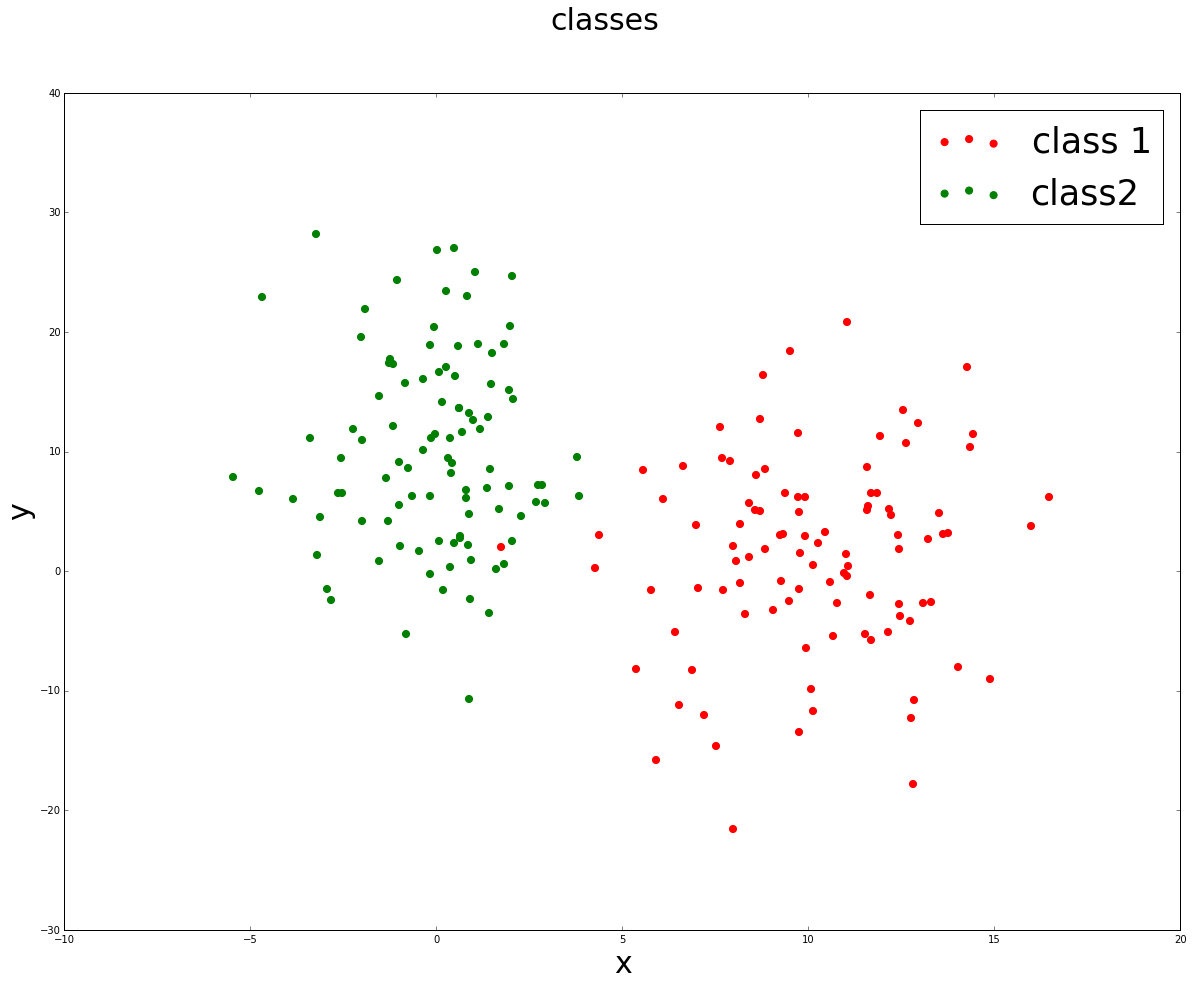

In [24]:
#Training and comparison of the clustering methods
np.random.seed(4711)  # for repeatability 
c1 = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
l1 = np.zeros(100)
l2 = np.ones(100)
c2 = np.random.multivariate_normal([0, 10], [[3, 1], [1, 4]], size=[100,])
#add noise:
np.random.seed(1)  # for repeatability 
noise1x = np.random.normal(0,2,100)
noise1y = np.random.normal(0,8,100)
noise2 = np.random.normal(0,8,100)
c1[:,0] += noise1x
c1[:,1] += noise1y
c2[:,1] += noise2

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.set_xlabel('x',fontsize=30)
ax.set_ylabel('y',fontsize=30)
fig.suptitle('classes',fontsize=30)
labels = np.concatenate((l1,l2),)
X = np.concatenate((c1, c2),)
pp1= ax.scatter(c1[:,0], c1[:,1],cmap='prism',s=50,color='r')
pp2= ax.scatter(c2[:,0], c2[:,1],cmap='prism',s=50,color='g')
ax.legend((pp1,pp2),('class 1', 'class2'),fontsize=35)
fig.savefig('classes.png')

In [ ]:
#start figure
fig.clf()#reset plt

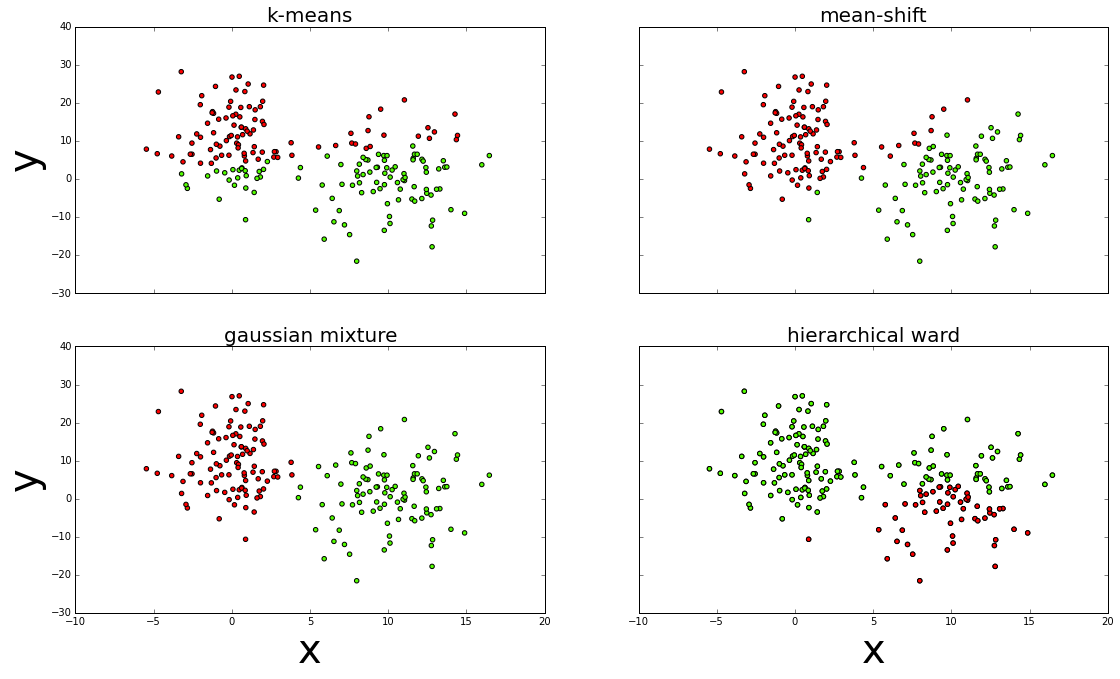

In [21]:
from sklearn import mixture
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2, sharex='col', sharey='row')

#k-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
pred_kmeans = kmeans.labels_
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='prism')  # plot points with cluster dependent colors
axis1.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='prism')
axis1.set_ylabel('y',fontsize=40)
axis1.set_title('k-means',fontsize=20)

#mean-shift
ms = MeanShift(bandwidth=7)
ms.fit(X)
pred_ms = ms.labels_
axis2.scatter(X[:,0], X[:,1], c=pred_ms, cmap='prism')
axis2.set_title('mean-shift',fontsize=20)

#gaussian mixture
g = mixture.GMM(n_components=2)
g.fit(X) 
pred_gmm = g.predict(X)
axis3.scatter(X[:,0], X[:,1], c=pred_gmm, cmap='prism')
axis3.set_xlabel('x',fontsize=40)
axis3.set_ylabel('y',fontsize=40)
axis3.set_title('gaussian mixture',fontsize=20)

#hierarchical
# generate the linkage matrix
Z = linkage(X, 'ward')
max_d = 110
pred_h = fcluster(Z, max_d, criterion='distance')
axis4.scatter(X[:,0], X[:,1], c=pred_h, cmap='prism')
axis4.set_xlabel('x',fontsize=40)
axis4.set_title('hierarchical ward',fontsize=20)
fig.set_size_inches(18.5,10.5)
fig.savefig('comp_clustering.png', dpi=100)

In [25]:
fig.clf()#reset plt

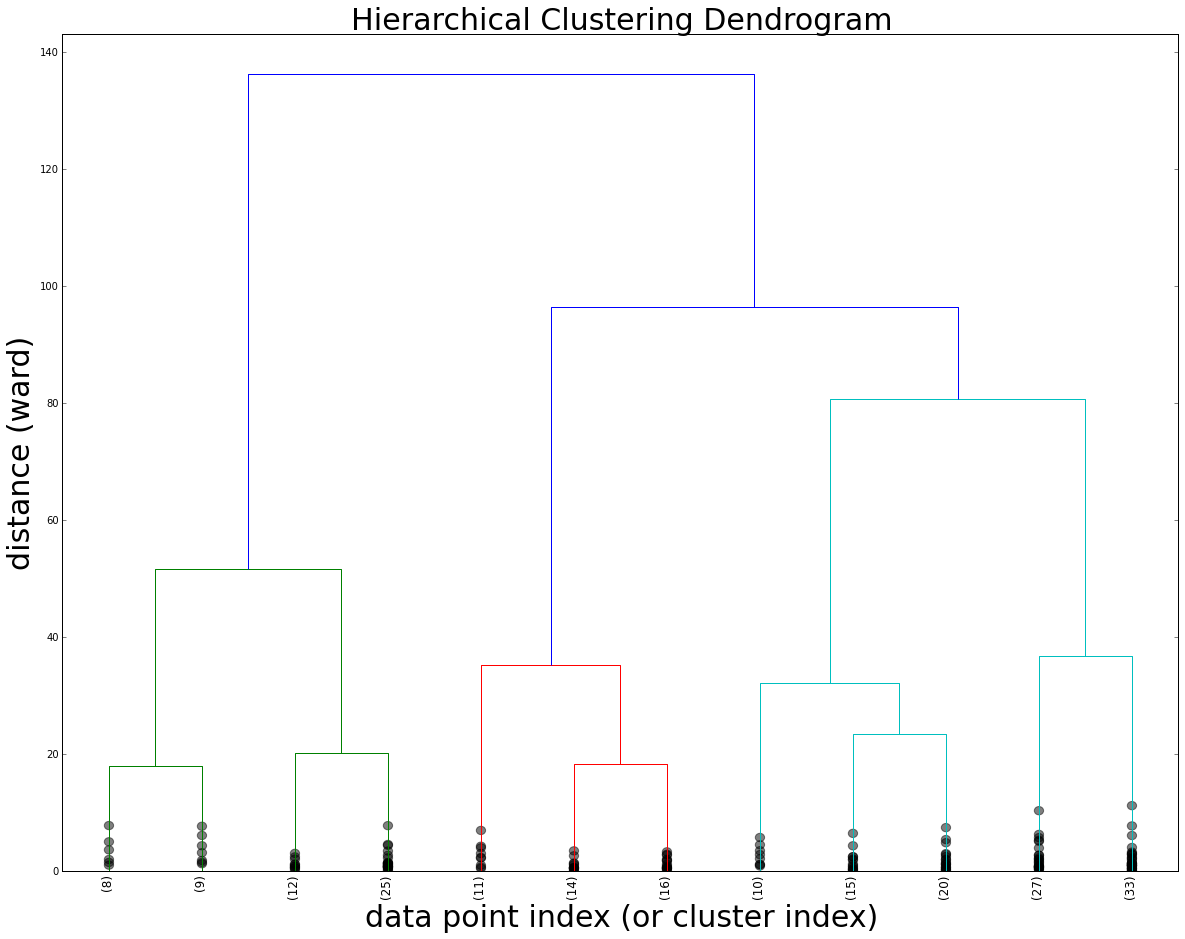

In [26]:
from scipy.cluster.hierarchy import dendrogram
fig = plt.figure(figsize=(20,15))
plt.title('Hierarchical Clustering Dendrogram',fontsize=30)
plt.xlabel('data point index (or cluster index)',fontsize=30)
plt.ylabel('distance (ward)',fontsize=30)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
fig.savefig('dendrogram.png')

In [23]:
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
res = homogeneity_completeness_v_measure(labels,pred_kmeans)
print 'kmeans measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_kmeans)
res = homogeneity_completeness_v_measure(labels,pred_ms)
print 'mean-shift measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_ms)
res = homogeneity_completeness_v_measure(labels,pred_gmm)
print 'gaussian mixture model measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_gmm)
res = homogeneity_completeness_v_measure(labels,pred_h)
print 'hierarchical (ward) measures, homogeneity:',res[0],' completeness:',res[1],' v-measure:',res[2],' silhouette score:',silhouette_score(X,pred_h)

kmeans measures, homogeneity: 0.25910415428  completeness: 0.259403626429  v-measure: 0.259253803872  silhouette score: 0.409469791511
mean-shift measures, homogeneity: 0.657373750073  completeness: 0.662158204648  v-measure: 0.65975730345  silhouette score: 0.40117810244
gaussian mixture model measures, homogeneity: 0.959531296098  completeness: 0.959600517797  v-measure: 0.959565905699  silhouette score: 0.380255218681
hierarchical (ward) measures, homogeneity: 0.302367273976  completeness: 0.359334499592  v-measure: 0.32839867574  silhouette score: 0.356446705251
